# Investment Fund Performance Overview  

This notebook analyzes the performance of various investment funds across **low**, **medium**, and **high** risk categories.  
Data is gathered from **TEFAS** (fund analysis), **fonbul.com** (risk & fund analysis), and **TCMB** (TÜFE, inflation data), merged and cleaned for accuracy.  
The dataset has been processed by removing redundancies, handling missing values, and eliminating duplicates, resulting in the **finalized TEFAS fund analysis dataset – August 2025**.  

*(ENG: Not investment advice / TUR: Yatırım tavsiyesi değildir)*  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('tefas_funds_aug25.csv')

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head()

,fund_code,fund_name,fund_type,fund_size_in_M,spk_risk_level,1M_return,3M_return,6M_return,YTD_return,1Y_return,3Y_return,5Y_return,real_1y_return,sharpe,max_loss,annual_fee,charter_annual_fee,annual_net_return,annual_max_total_expense_ratio
0,TLY,TERA PORTFÖY BİRİNCİ SERBEST FON,Serbest Şemsiye Fonu,14910.00,7,49.3137,119.4462,491.4380,1165.1468,4577.1530,53559.0468,NaN,3402.96,6.4795,23.2366,0.000000,2.000000,4651.89,0.0
1,ZJI,ZİRAAT PORTFÖY İKİNCİ SERBEST (TL) FON,Serbest Şemsiye Fonu,12930.00,6,3.2468,8.3334,50.1332,66.7425,240.0395,582.5122,NaN,154.67,3.8664,10.6828,0.100000,0.100000,242.51,0.0
2,ZJB,ZİRAAT PORTFÖY BİRİNCİ SERBEST (TL) FON,Serbest Şemsiye Fonu,15960.00,6,3.5983,6.5784,45.1031,62.2819,230.3955,561.8631,NaN,147.45,3.7332,10.5744,0.100000,0.100000,232.55,0.0
3,IIE,İSTANBUL PORTFÖY ONDÖRDÜNCÜ SERBEST FON,Serbest Şemsiye Fonu,3660.00,6,15.3333,22.8131,75.0319,93.7093,139.1095,NaN,NaN,79.08,2.6687,26.7621,3.150315,3.150315,136.20,NaN
4,DDF,DENİZ PORTFÖY DİNAMO SERBEST FON,Serbest Şemsiye Fonu,660.35,5,0.5901,10.7417,64.4218,61.2514,121.2601,389.0837,567.109,65.71,2.3252,14.2389,0.600000,0.600000,118.11,0.0


# Fund Universe Overview
We begin by examining the distribution of funds by type and their SPK risk levels.  
This step helps us understand the variety and risk profile of funds available on TEFAS in August 2025.

In [ ]:
total_funds = len(df)
print('Funds in dataset:', total_funds)

Funds in dataset: 871


### Fund Type Distribution

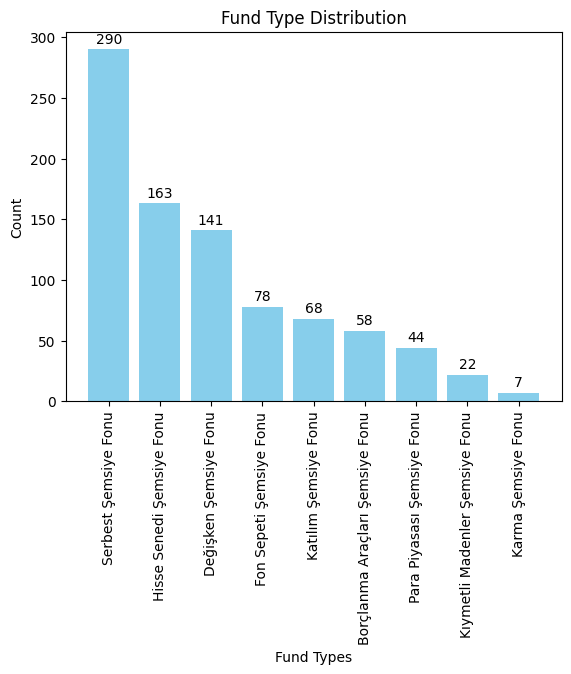

In [ ]:
# Displays a bar chart of the number of funds in each category.
# Counts are labeled above each bar for quick reference.

fund_type_distribution = df['fund_type'].value_counts()
plt.bar(fund_type_distribution.index,fund_type_distribution.values, color='skyblue')
plt.xlabel('Fund Types')
plt.ylabel('Count')
plt.title('Fund Type Distribution')
plt.xticks(rotation=90)

for i, value in enumerate(fund_type_distribution.values):
    plt.text(i, value+5, str(value), ha='center')

plt.show()
# Insight: The market is dominated by "Serbest Şemsiye Fonu" (Free Umbrella Funds), 
# which make up nearly 1/3 of all funds. New entrants may face tough competition here, 
# while niche segments like "Karma" and "Kıymetli Madenler" are less crowded 
# and could offer easier entry opportunities for specialized strategies.

### SPK Risk Level Distribution

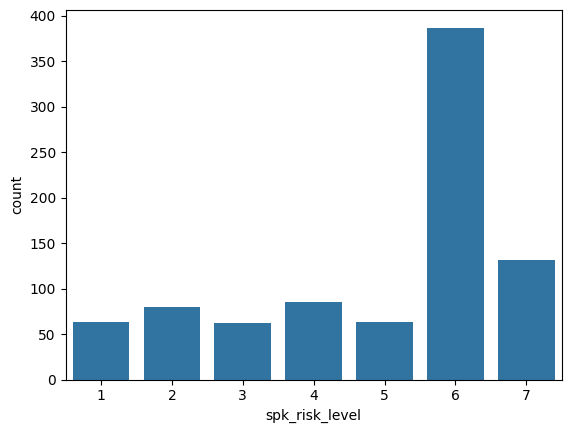

In [ ]:
# Count plot showing the number of funds in each SPK risk level category.
sns.countplot(x='spk_risk_level', data=df)
plt.show()
# Insight: Most funds are classified at SPK Risk Level 6, indicating a market skewed towards higher-risk products.
# This suggests strong investor appetite for potentially higher returns despite greater volatility,
# but also highlights a gap for low-to-moderate risk offerings (Levels 1–3) that could attract conservative investors.

### Fund Type vs SPK Risk Level

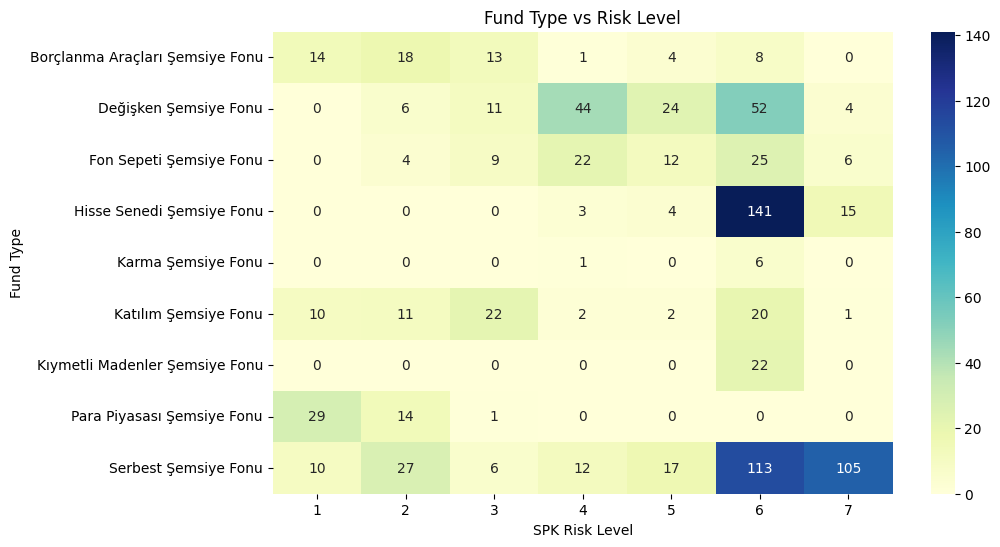

In [ ]:
# Heatmap showing the count of funds by type and SPK risk level.

pivot_table= df.pivot_table(index='fund_type',columns='spk_risk_level',aggfunc='size',fill_value=0)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Fund Type vs Risk Level')
plt.xlabel('SPK Risk Level')
plt.ylabel('Fund Type')
plt.show()
# Insight: Certain fund types show a clear bias toward specific risk levels.
# Example: Hisse Senedi and Serbest Şemsiye Fonları dominate high-risk categories (Levels 6–7),
# while Para Piyasası funds cluster in low-risk levels (1–2).
# This highlights how product nature aligns strongly with risk classification.

### AUM Share by Fund Type

<Axes: ylabel='fund_size_in_M'>

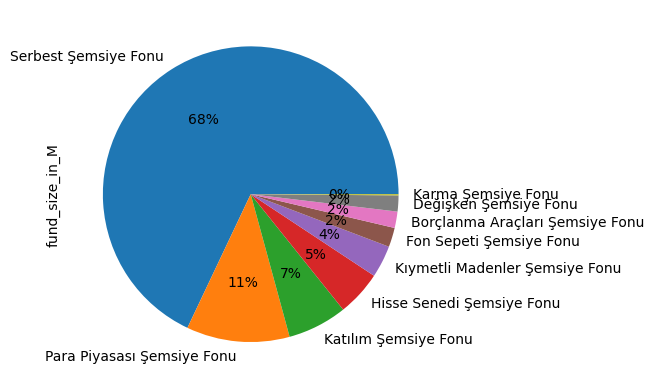

In [ ]:
# Calculates and plots the percentage of total assets under management (AUM) for each fund type as a pie chart.
aum_type = df.groupby('fund_type')['fund_size_in_M'].sum()
total_aum = aum_type.sum()

aum_percentage = (aum_type/total_aum) *100
aum_percentage = aum_percentage.round(2).sort_values(ascending=False)


aum_percentage.plot(kind='pie',y='vote',autopct='%1.0f%%')
# Insight: Serbest Şemsiye Fonları dominate the market, holding 68% of total assets.
# The remaining categories have much smaller market shares, indicating high concentration.
# This suggests that independent/alternative funds play a leading role in TEFAS.

### Top 10 Funds by AUM


In [ ]:
# Lists the largest funds by assets under management (AUM) along with type, risk level, and real 1-year return.

data = df[['fund_code','fund_type','fund_size_in_M','spk_risk_level','real_1y_return']]
data.sort_values(by='fund_size_in_M', ascending= False).head(10)
# Insight: The largest funds by AUM are all Serbest Şemsiye Fonları, but most have low or negative real 1-year returns.
# This suggests that fund size does not necessarily correlate with profitability for investors.

,fund_code,fund_type,fund_size_in_M,spk_risk_level,real_1y_return
77,DCB,Serbest Şemsiye Fonu,192710.0,1,19.75
488,GRO,Serbest Şemsiye Fonu,152100.0,5,-5.37
486,DAS,Serbest Şemsiye Fonu,146730.0,5,-5.34
487,PAL,Serbest Şemsiye Fonu,130040.0,6,-5.36
491,YP4,Serbest Şemsiye Fonu,117750.0,6,-5.48
494,ONS,Serbest Şemsiye Fonu,101950.0,4,-5.68
485,FPZ,Serbest Şemsiye Fonu,91540.0,6,-5.33
507,GPL,Serbest Şemsiye Fonu,91530.0,6,-6.51
395,EUZ,Serbest Şemsiye Fonu,90260.0,6,-1.31
380,DOV,Serbest Şemsiye Fonu,65990.0,6,-0.76


## 2. Short-term vs. Long-term Performance
While some funds show strong short-term (1Y) returns, their long-term (3Y) performance may lag — and vice versa.  
This highlights the importance of evaluating both horizons, as relying solely on short-term gains can be misleading for sustained growth.

In [ ]:
df.describe()

,fund_size_in_M,spk_risk_level,1M_return,3M_return,6M_return,YTD_return,1Y_return,3Y_return,5Y_return,real_1y_return,sharpe,max_loss,annual_fee,charter_annual_fee,annual_net_return,annual_max_total_expense_ratio
count,864.000000,871.000000,850.000000,807.000000,752.000000,729.000000,679.000000,459.000000,268.000000,679.000000,680.000000,680.000000,869.000000,869.000000,869.000000,480.000000
mean,3711.007187,4.940299,4.337683,14.604180,20.209993,24.658424,45.020452,382.399346,717.145711,8.613461,6.470359,9.363961,1.993628,1.486046,34.872934,2.906552
std,14758.331511,1.847302,3.712410,8.065301,19.512772,43.919843,175.752284,2490.589190,462.230811,131.629879,8.312194,8.776801,0.841185,1.132405,158.972060,1.438662
min,1.130000,1.000000,-7.785800,-18.301300,-26.645000,-36.734400,-79.671500,-84.851300,90.363600,-84.770000,-10.222800,0.000000,0.000000,0.000000,-79.620000,0.000000
25%,71.752500,4.000000,2.774475,10.402900,14.199575,15.698100,24.718050,183.856150,327.642525,-6.590000,1.262775,1.693650,1.300000,0.000000,5.620000,2.190000
50%,351.375000,6.000000,3.753500,12.756500,19.130950,22.129200,34.942200,233.084300,619.338950,1.070000,2.847600,8.052850,2.000000,1.500000,28.880000,3.650000
75%,1367.500000,6.000000,4.891025,18.714900,24.372775,29.693200,53.145600,321.680850,868.319075,14.695000,6.639300,15.301925,2.700000,2.500000,48.870000,3.650000
max,192710.000000,7.000000,52.365300,119.446200,491.438000,1165.146800,4577.153000,53559.046800,2501.009600,3402.960000,31.878800,86.928300,5.000000,5.000000,4651.890000,4.380000


## Top 10 Best Performer Funds in all time periods

### 1-Month Return

In [ ]:
# Top 1M performers are mostly Serbest and Hisse Senedi funds with SPK risk level 7,
# indicating high short-term gains but also high volatility and risk.

def compare_top(return_type):
    sorted_df = df.sort_values(by=return_type,ascending=False)
    top_10=sorted_df[['fund_code','fund_type','spk_risk_level',return_type,]].head(10)
    return top_10
compare_top('1M_return')

,fund_code,fund_type,spk_risk_level,1M_return
820,PBN,Serbest Şemsiye Fonu,7,52.3653
0,TLY,Serbest Şemsiye Fonu,7,49.3137
803,PAO,Serbest Şemsiye Fonu,7,26.7460
842,SBH,Serbest Şemsiye Fonu,7,20.1560
804,BRT,Serbest Şemsiye Fonu,7,18.5853
9,KLH,Serbest Şemsiye Fonu,6,18.2979
538,KST,Hisse Senedi Şemsiye Fonu,6,17.8792
670,HKM,Serbest Şemsiye Fonu,7,17.0125
811,POS,Serbest Şemsiye Fonu,7,16.0962
805,PPH,Hisse Senedi Şemsiye Fonu,6,15.6445


### 3-Month Return

In [ ]:
# Top 3M performers are dominated by Serbest and Hisse Senedi funds with SPK risk level 7,
# showing strong medium-term growth but with high volatility. One Değişken fund with lower risk
# also appears, suggesting occasional standout performers in moderate-risk categories.

compare_top('3M_return')

,fund_code,fund_type,spk_risk_level,3M_return
0,TLY,Serbest Şemsiye Fonu,7,119.4462
820,PBN,Serbest Şemsiye Fonu,7,65.1429
691,URA,Değişken Şemsiye Fonu,4,48.2499
7,HGV,Serbest Şemsiye Fonu,7,46.4792
626,DDA,Serbest Şemsiye Fonu,7,42.6590
521,TAU,Hisse Senedi Şemsiye Fonu,7,40.5148
544,YZH,Hisse Senedi Şemsiye Fonu,7,39.6587
532,ADP,Hisse Senedi Şemsiye Fonu,7,39.3410
509,GBJ,Serbest Şemsiye Fonu,7,38.8100
673,DKR,Serbest Şemsiye Fonu,7,38.6916


### 6-Month Return

In [ ]:
# The 6-month top performers are mostly Serbest Şemsiye Fonları with SPK risk levels 6–7,
# indicating high-risk, high-reward behavior over the medium term.
# One Hisse Senedi Şemsiye Fonu also appears, reinforcing equities’ strong short-to-medium performance.
# Returns drop sharply after the top fund (TLY), which again shows an extreme outlier effect.
compare_top('6M_return')

,fund_code,fund_type,spk_risk_level,6M_return
0,TLY,Serbest Şemsiye Fonu,7,491.4380
242,LLA,Serbest Şemsiye Fonu,6,88.2932
3,IIE,Serbest Şemsiye Fonu,6,75.0319
8,BDS,Hisse Senedi Şemsiye Fonu,6,67.2495
4,DDF,Serbest Şemsiye Fonu,5,64.4218
5,BDC,Serbest Şemsiye Fonu,7,54.7874
1,ZJI,Serbest Şemsiye Fonu,6,50.1332
15,TMM,Serbest Şemsiye Fonu,6,46.1698
7,HGV,Serbest Şemsiye Fonu,7,45.5111
2,ZJB,Serbest Şemsiye Fonu,6,45.1031


### 1-Year Return

In [ ]:
# The 1Y return leaderboard is overwhelmingly led by Serbest Şemsiye Fonları across various risk levels.
# The top fund shows an exceptionally high return (4577%), which is likely an outlier or the result of a rare market event.
# Most top performers remain in high-risk categories, highlighting the risk-reward trade-off in long-term investing.
compare_top('1Y_return')

,fund_code,fund_type,spk_risk_level,1Y_return
0,TLY,Serbest Şemsiye Fonu,7,4577.1530
1,ZJI,Serbest Şemsiye Fonu,6,240.0395
2,ZJB,Serbest Şemsiye Fonu,6,230.3955
3,IIE,Serbest Şemsiye Fonu,6,139.1095
4,DDF,Serbest Şemsiye Fonu,5,121.2601
5,BDC,Serbest Şemsiye Fonu,7,116.2171
6,RTP,Serbest Şemsiye Fonu,4,104.8662
7,HGV,Serbest Şemsiye Fonu,7,99.7654
8,BDS,Hisse Senedi Şemsiye Fonu,6,94.1952
9,KLH,Serbest Şemsiye Fonu,6,93.0898


### Year-to-date Return

In [ ]:
# Year-to-date performance is again dominated by Serbest Şemsiye Fonları, with one fund (TLY) showing an extreme outlier return above 1000%.
# Such an outlier may indicate extraordinary market conditions or a one-time event, requiring caution before drawing conclusions.
# Other top funds maintain strong double-digit growth, mostly in high-risk categories, reinforcing the trend seen in other periods.
compare_top('YTD_return')

,fund_code,fund_type,spk_risk_level,YTD_return
0,TLY,Serbest Şemsiye Fonu,7,1165.1468
3,IIE,Serbest Şemsiye Fonu,6,93.7093
242,LLA,Serbest Şemsiye Fonu,6,90.0524
8,BDS,Hisse Senedi Şemsiye Fonu,6,71.4597
7,HGV,Serbest Şemsiye Fonu,7,66.9928
1,ZJI,Serbest Şemsiye Fonu,6,66.7425
5,BDC,Serbest Şemsiye Fonu,7,65.4332
2,ZJB,Serbest Şemsiye Fonu,6,62.2819
4,DDF,Serbest Şemsiye Fonu,5,61.2514
15,TMM,Serbest Şemsiye Fonu,6,57.8074


### Real 1-Year Return

In [ ]:
# Real 1-year returns show a massive outlier in TLY (3402.96%), which heavily skews the perception of the market.
# The rest of the top performers maintain high returns between ~44% and 155%, again dominated by Serbest Şemsiye Fonları in high-risk categories.
# Such extreme outliers should be investigated for one-off events, leverage, or unusual market conditions before being taken as an investment signal.
compare_top('real_1y_return')

,fund_code,fund_type,spk_risk_level,real_1y_return
0,TLY,Serbest Şemsiye Fonu,7,3402.96
1,ZJI,Serbest Şemsiye Fonu,6,154.67
2,ZJB,Serbest Şemsiye Fonu,6,147.45
3,IIE,Serbest Şemsiye Fonu,6,79.08
4,DDF,Serbest Şemsiye Fonu,5,65.71
5,BDC,Serbest Şemsiye Fonu,7,61.94
6,RTP,Serbest Şemsiye Fonu,4,53.43
7,HGV,Serbest Şemsiye Fonu,7,49.61
8,BDS,Hisse Senedi Şemsiye Fonu,6,45.44
9,KLH,Serbest Şemsiye Fonu,6,44.61


### 3-Year Return

In [ ]:
# The 3-year returns are heavily skewed by TLY's extreme value (53,559%), which appears to be an anomaly.
# Aside from TLY, top performers range between ~598% and ~721%, with a mix of Serbest Şemsiye Fonları, Değişken Şemsiye Fonları, and Hisse Senedi Şemsiye Fonları.
# High SPK risk levels (6–7) dominate, suggesting that riskier funds have yielded stronger medium-term gains.
compare_top('3Y_return')

,fund_code,fund_type,spk_risk_level,3Y_return
0,TLY,Serbest Şemsiye Fonu,7,53559.0468
529,IPB,Değişken Şemsiye Fonu,6,721.4435
6,RTP,Serbest Şemsiye Fonu,4,716.3151
543,GZN,Serbest Şemsiye Fonu,7,702.0242
628,IIH,Hisse Senedi Şemsiye Fonu,6,678.9100
530,TTL,Serbest Şemsiye Fonu,7,675.3740
426,HKH,Hisse Senedi Şemsiye Fonu,6,617.3434
521,TAU,Hisse Senedi Şemsiye Fonu,7,615.3606
532,ADP,Hisse Senedi Şemsiye Fonu,7,599.7102
602,IDH,Hisse Senedi Şemsiye Fonu,7,598.5572


### 5 Year Return

In [ ]:
# Over 5 years, performance is more evenly distributed, with no extreme outliers like in the 3Y period.
# Top performers mostly cluster around 1,750–2,500% returns, heavily dominated by Hisse Senedi Şemsiye Fonları (equity funds) at SPK risk level 6.
# Serbest Şemsiye Fonları also appear, showing strong long-term resilience despite being more volatile.compare_top('5Y_return')

,fund_code,fund_type,spk_risk_level,5Y_return
530,TTL,Serbest Şemsiye Fonu,7,2501.0096
628,IIH,Hisse Senedi Şemsiye Fonu,6,2435.5615
529,IPB,Değişken Şemsiye Fonu,6,2172.3873
385,NNF,Hisse Senedi Şemsiye Fonu,6,2038.1823
558,HVS,Hisse Senedi Şemsiye Fonu,6,1996.7507
241,TPP,Serbest Şemsiye Fonu,6,1863.4765
634,TI2,Hisse Senedi Şemsiye Fonu,6,1796.2791
608,FYD,Hisse Senedi Şemsiye Fonu,6,1777.3311
583,GHS,Hisse Senedi Şemsiye Fonu,6,1776.3171
569,AHI,Hisse Senedi Şemsiye Fonu,6,1757.6576


## General Insight on Top Performers Across Periods
Across all periods (1M, 3M, 1Y, YTD, Real 1Y, 3Y, and 5Y), **Serbest Şemsiye Fonları** consistently dominate short-term and medium-term rankings, often paired with **SPK risk levels 6 and 7**, indicating a strong link between higher risk and higher returns in this dataset.
In longer-term horizons (3Y and 5Y), **Hisse Senedi Şemsiye Fonları** become increasingly prominent, especially at SPK risk level 6, suggesting equities’ strong compounding effect over time.
However, extreme outliers such as **TLY’s 3Y return (53,559%)** and **Real 1Y return (3,402%)** significantly distort averages and should be treated with caution. These anomalies may result from unique market events, fund restructuring, or leverage rather than sustainable performance.
Overall, the data shows a **risk–reward trade-off** where higher SPK risk levels correlate with higher potential returns, but volatility and anomalies highlight the need for due diligence.

## Top 10 Worst Performers in all time periods

### 1-Month Return

In [ ]:
# The worst 1-month performers are mostly Serbest Şemsiye Fonları with SPK risk levels 5–7,
# indicating that high volatility can also lead to steep short-term losses.
# A few Hisse Senedi and Değişken funds also appear, showing that underperformance
# is not exclusive to one fund type, but often tied to market swings and sector exposure.
def compare_bottom(return_type):
    sorted_df = df.dropna(subset=[return_type]).sort_values(by=return_type, ascending=True)
    bottom_10 = sorted_df[['fund_code', 'fund_type', 'spk_risk_level', return_type]].head(10)
    return bottom_10

compare_bottom('1M_return')

,fund_code,fund_type,spk_risk_level,1M_return
649,ZVO,Serbest Şemsiye Fonu,6,-7.7858
825,PKD,Serbest Şemsiye Fonu,7,-7.5607
677,IZF,Serbest Şemsiye Fonu,6,-5.1561
666,KID,Serbest Şemsiye Fonu,5,-4.3867
584,DFI,Serbest Şemsiye Fonu,7,-1.5044
578,PHE,Hisse Senedi Şemsiye Fonu,6,-1.4189
235,IZS,Serbest Şemsiye Fonu,6,-1.3721
614,TAR,Değişken Şemsiye Fonu,6,-1.2548
655,AFS,Hisse Senedi Şemsiye Fonu,6,-1.1318
503,SPR,Değişken Şemsiye Fonu,6,-0.7621


### 3-Month Return

In [ ]:
# The weakest 3-month performers are largely Serbest Şemsiye funds, spanning SPK risk levels 5–7,
# with significant losses for some mid- and high-risk portfolios.
# A small number of other fund types (Kıymetli Madenler, Değişken, Katılım) appear,
# suggesting that recent market movements affected multiple asset classes.
compare_bottom('3M_return')

,fund_code,fund_type,spk_risk_level,3M_return
677,IZF,Serbest Şemsiye Fonu,6,-18.3013
666,KID,Serbest Şemsiye Fonu,5,-12.8669
675,THV,Serbest Şemsiye Fonu,7,-4.0154
611,IZB,Serbest Şemsiye Fonu,6,-3.5209
33,PAF,Kıymetli Madenler Şemsiye Fonu,6,-2.3316
658,IJT,Serbest Şemsiye Fonu,6,-0.8277
655,AFS,Hisse Senedi Şemsiye Fonu,6,-0.2508
585,YSL,Serbest Şemsiye Fonu,6,1.4790
642,GZG,Değişken Şemsiye Fonu,5,2.3061
21,TCA,Katılım Şemsiye Fonu,6,2.8010


### 6-Month Return

In [ ]:
# The poorest 6-month performers are dominated by Serbest Şemsiye funds,
# many with SPK risk levels 6–7, indicating sustained underperformance in high-risk strategies.
# Losses here are deeper and more persistent, pointing to longer-term challenges
# in specific sectors or investment strategies.
compare_bottom('6M_return')

,fund_code,fund_type,spk_risk_level,6M_return
677,IZF,Serbest Şemsiye Fonu,6,-26.6450
675,THV,Serbest Şemsiye Fonu,7,-16.2069
474,ESP,Serbest Şemsiye Fonu,7,-9.4648
844,LPH,Serbest Şemsiye Fonu,7,-7.5830
666,KID,Serbest Şemsiye Fonu,5,-7.1937
672,ONE,Serbest Şemsiye Fonu,6,-4.4499
834,RKH,Serbest Şemsiye Fonu,7,-4.2379
658,IJT,Serbest Şemsiye Fonu,6,-1.1482
678,THT,Serbest Şemsiye Fonu,7,-0.7188
636,RBN,Serbest Şemsiye Fonu,6,-0.2795


### 1-Year Return

In [ ]:
# The lowest nominal 1-year performers are almost entirely Serbest Şemsiye funds with SPK risk levels 6–7,
# showing substantial losses over the past year.
# The scale of declines, particularly for high-risk portfolios, indicates vulnerability to adverse market conditions.
compare_bottom('1Y_return')

,fund_code,fund_type,spk_risk_level,1Y_return
678,THT,Serbest Şemsiye Fonu,7,-79.6715
677,IZF,Serbest Şemsiye Fonu,6,-75.1930
676,BUL,Serbest Şemsiye Fonu,6,-18.2920
675,THV,Serbest Şemsiye Fonu,7,-15.0078
674,GIH,Hisse Senedi Şemsiye Fonu,6,-13.4190
673,DKR,Serbest Şemsiye Fonu,7,-10.3471
672,ONE,Serbest Şemsiye Fonu,6,-9.7496
671,NHY,Hisse Senedi Şemsiye Fonu,7,-5.8099
670,HKM,Serbest Şemsiye Fonu,7,-5.6421
669,BHL,Serbest Şemsiye Fonu,6,-2.3878


### Real 1-Year Return

In [ ]:
# After adjusting for inflation, losses deepen significantly across the same group of funds,
# with real declines exceeding -80% for the worst performers.
# This highlights that high nominal losses were compounded by inflation erosion,
# further reducing investors' real purchasing power.
compare_bottom('real_1y_return')

,fund_code,fund_type,spk_risk_level,real_1y_return
678,THT,Serbest Şemsiye Fonu,7,-84.77
677,IZF,Serbest Şemsiye Fonu,6,-81.42
676,BUL,Serbest Şemsiye Fonu,6,-38.80
675,THV,Serbest Şemsiye Fonu,7,-36.34
674,GIH,Hisse Senedi Şemsiye Fonu,6,-35.16
673,DKR,Serbest Şemsiye Fonu,7,-32.85
672,ONE,Serbest Şemsiye Fonu,6,-32.41
671,NHY,Hisse Senedi Şemsiye Fonu,7,-29.46
670,HKM,Serbest Şemsiye Fonu,7,-29.33
669,BHL,Serbest Şemsiye Fonu,6,-26.89


### 3-Year Return

In [ ]:
# The worst 3-year performer is a Serbest Şemsiye fund (IZF) with an extreme -84.85% return,
# indicating severe long-term underperformance.  
# Most other funds in this list actually have positive returns, meaning that poor ranking here
# can also stem from the dataset being skewed toward high-return peers rather than absolute losses.
# Includes diverse categories (Serbest, Hisse Senedi, Borçlanma Araçları, Para Piyasası),
# showing that underperformance over 3 years isn’t limited to high-risk assets.
compare_bottom('3Y_return')

,fund_code,fund_type,spk_risk_level,3Y_return
677,IZF,Serbest Şemsiye Fonu,6,-84.8513
584,DFI,Serbest Şemsiye Fonu,7,-21.1428
826,ORC,Serbest Şemsiye Fonu,7,4.4075
741,GPZ,Para Piyasası Şemsiye Fonu,1,9.7631
579,AOY,Hisse Senedi Şemsiye Fonu,7,20.3274
518,AK2,Borçlanma Araçları Şemsiye Fonu,5,54.8525
542,YJH,Değişken Şemsiye Fonu,6,66.6585
564,TBT,Borçlanma Araçları Şemsiye Fonu,3,73.1956
511,GZH,Değişken Şemsiye Fonu,6,79.7962
414,DFD,Serbest Şemsiye Fonu,6,81.0039


### 5-Year Return

In [ ]:
# The lowest 5-year performers are dominated by Borçlanma Araçları Şemsiye funds with SPK risk level 3–5,
# showing relatively low but steady returns that lag behind high-growth categories over the long term.
# Even the weakest here still posted positive returns over 5 years, suggesting that 
# very long-term negative performance is rare, but opportunity cost compared to top performers is significant.
compare_bottom('5Y_return')

,fund_code,fund_type,spk_risk_level,5Y_return
518,AK2,Borçlanma Araçları Şemsiye Fonu,5,90.3636
564,TBT,Borçlanma Araçları Şemsiye Fonu,3,109.1748
579,AOY,Hisse Senedi Şemsiye Fonu,7,137.5832
350,APT,Borçlanma Araçları Şemsiye Fonu,3,145.1030
430,FIT,Borçlanma Araçları Şemsiye Fonu,3,165.8985
329,AAS,Serbest Şemsiye Fonu,5,194.1741
389,HST,Borçlanma Araçları Şemsiye Fonu,3,209.1719
149,MBL,Değişken Şemsiye Fonu,2,212.4028
326,DBB,Borçlanma Araçları Şemsiye Fonu,3,217.0765
255,AUT,Değişken Şemsiye Fonu,3,227.8015


## General Insights – Bottom Performers

Across different time horizons, certain patterns emerge among the lowest-performing funds:

1. **Short-Term Declines Are More Concentrated**  
   - In the 1M and 3M periods, several Serbest Şemsiye funds with SPK risk levels 6–7 dominate the bottom ranks.  
   - These declines often reflect short-term market volatility rather than long-term structural weakness.

2. **High-Risk Funds Show Larger Losses**  
   - High-risk funds (SPK level 7) are overrepresented in sharp negative returns, particularly in the 6M and 1Y periods.  
   - Notable cases include severe drawdowns exceeding -70% in the past year for some Serbest Şemsiye funds.

3. **Long-Term Underperformance is Rarely Negative**  
   - Over 3Y and 5Y horizons, most “bottom” funds still post positive returns, especially in lower-risk categories like Borçlanma Araçları and Para Piyasası funds.  
   - Their inclusion in the bottom group often stems from opportunity cost versus high-growth peers, not actual losses.

4. **Category-Specific Trends**  
   - **Borçlanma Araçları Şemsiye Fonu** appears frequently in the 5Y bottom list, highlighting steady but modest growth that underperforms equity-heavy funds.  
   - **Serbest Şemsiye Fonu** funds tend to be the main drivers of deep short- to mid-term losses.

5. **Performance Volatility Matters**  
   - Funds appearing in both short-term and real annual bottom lists may signal persistent weaknesses or poor risk management, requiring further scrutiny before investment.


### Consistent Top Performers 

In [ ]:
# Insight on Top Quartile Frequency and Returns:
# - TLY dominates with 5 top quartile appearances and extremely high returns 
#   (53,559% 3Y return, 3,403% real 1Y return), indicating massive growth but likely high volatility.
# - BDC also appears 5 times in the top quartile with solid multi-period performance, though far lower than TLY.
# - SVB, TEJ, and GPT appear 4 times each, showing consistent strength across timeframes.
# - Frequent top quartile presence generally aligns with sustained returns, but return magnitude can vary greatly.
# - Caution: Outlier multi-year returns (e.g., TLY) may reflect concentrated, high-risk strategies.

periods = ['1M_return','3M_return','6M_return','real_1y_return','3Y_return']
df_copy = df.copy()

for period in periods:
    threshold = df_copy[period].quantile(0.75)
    df_copy[period + 'top_quartile'] = df_copy[period] >= threshold

df_copy['top_quartile_count'] = df_copy[[p+'top_quartile' for p in periods]].sum(axis=1)

consistent_performers = df_copy[df_copy['top_quartile_count'] >=3]

consistent_performers = consistent_performers.sort_values(by='top_quartile_count',ascending=False)
consistent_performers = consistent_performers[['fund_code','fund_type','top_quartile_count']+periods].head(20)

consistent_performers

,fund_code,fund_type,top_quartile_count,1M_return,3M_return,6M_return,real_1y_return,3Y_return
0,TLY,Serbest Şemsiye Fonu,5,49.3137,119.4462,491.4380,3402.96,53559.0468
5,BDC,Serbest Şemsiye Fonu,5,7.8225,36.6268,54.7874,61.94,547.7816
233,SVB,Değişken Şemsiye Fonu,4,9.6737,25.9798,28.9243,10.24,483.7352
89,TEJ,Fon Sepeti Şemsiye Fonu,4,5.3381,26.1297,27.3588,19.31,NaN
120,GPT,Değişken Şemsiye Fonu,4,8.0757,20.2365,29.4427,18.07,NaN
130,MTX,Değişken Şemsiye Fonu,4,6.1278,27.3775,28.4452,17.53,273.1543
44,RUT,Değişken Şemsiye Fonu,4,4.9060,24.7556,32.5608,25.56,NaN
40,MJG,Fon Sepeti Şemsiye Fonu,4,5.3159,20.2314,34.9370,26.40,306.5712
136,OPF,Değişken Şemsiye Fonu,4,5.7701,19.5534,24.7173,17.45,NaN
31,BTE,Değişken Şemsiye Fonu,4,5.8214,22.5705,31.3454,28.03,NaN


### Top 10 Performers in Real 1-Year Return

In [ ]:
# - TLY stands out dramatically with a 3,402.96% return at SPK risk level 7,
#   indicating extremely high growth potential but also likely high volatility.
# - Remaining top performers (ZJI, ZJB, IIE, etc.) have strong double- to triple-digit returns,
#   predominantly from Serbest Şemsiye Fonu category, suggesting aggressive investment strategies.
# - SPK risk levels range from 4 to 7, with most clustered at 6–7, reinforcing the link between 
#   higher risk levels and higher short-term returns.

df[['fund_code','fund_type','spk_risk_level','real_1y_return']].sort_values(by='real_1y_return',ascending=False)

,fund_code,fund_type,spk_risk_level,real_1y_return
0,TLY,Serbest Şemsiye Fonu,7,3402.96
1,ZJI,Serbest Şemsiye Fonu,6,154.67
2,ZJB,Serbest Şemsiye Fonu,6,147.45
3,IIE,Serbest Şemsiye Fonu,6,79.08
4,DDF,Serbest Şemsiye Fonu,5,65.71
...,...,...,...,...
866,PPI,Para Piyasası Şemsiye Fonu,1,NaN
867,YBH,Serbest Şemsiye Fonu,7,NaN
868,ZHH,Hisse Senedi Şemsiye Fonu,4,NaN
869,ZPR,Serbest Şemsiye Fonu,7,NaN


### Average Performance by Fund Type (Ranked by Real 1-Year Return)

In [ ]:
# - Kıymetli Madenler Şemsiye Fonu leads with an avg. real 1Y return of 26.48%, 
#   showing strong performance across both short and long horizons.
# - Serbest, Para Piyasası, and Katılım funds follow, maintaining high returns 
#   in the 3Y and 5Y windows as well.
# - Hisse Senedi Şemsiye Fonu is the only category with a negative avg. real 1Y return (-10.36%), 
#   despite having the highest 5Y average return, indicating higher volatility and cyclical performance.

result = df.groupby('fund_type')[['real_1y_return', '1Y_return', '3Y_return', '5Y_return']].mean().round(3).sort_values(by='real_1y_return',ascending=False)
result

,real_1y_return,1Y_return,3Y_return,5Y_return
fund_type,,,,
Kıymetli Madenler Şemsiye Fonu,26.479,68.877,310.640,764.379
Serbest Şemsiye Fonu,19.457,59.499,698.624,597.139
Para Piyasası Şemsiye Fonu,18.921,58.782,194.337,302.539
Katılım Şemsiye Fonu,12.163,49.759,216.935,406.623
Karma Şemsiye Fonu,9.067,45.627,222.870,658.948
Borçlanma Araçları Şemsiye Fonu,7.653,43.739,177.208,364.000
Fon Sepeti Şemsiye Fonu,5.729,41.168,228.046,595.700
Değişken Şemsiye Fonu,4.337,39.311,276.779,687.707
Hisse Senedi Şemsiye Fonu,-10.364,19.682,398.479,1277.271


### Maximum Drawdown of Top Annual Performers

In [ ]:
# - TLY shows the highest 1Y and real 1Y returns, but also a relatively high max loss (~23.24%), indicating higher volatility.
# - ZJI and ZJB maintain strong returns with moderate drawdowns (~10-11%), suggesting better risk-adjusted performance.
# - Some high-return funds like IIE and HGV also exhibit drawdowns above 20%, highlighting the trade-off between return and risk.
# - Missing max_loss for BDC should be addressed before final analysis to avoid skewed risk assessments.

df[['fund_code','1Y_return','real_1y_return','max_loss']].sort_values(by='real_1y_return',ascending=False).head(15)

,fund_code,1Y_return,real_1y_return,max_loss
0,TLY,4577.1530,3402.96,23.2366
1,ZJI,240.0395,154.67,10.6828
2,ZJB,230.3955,147.45,10.5744
3,IIE,139.1095,79.08,26.7621
4,DDF,121.2601,65.71,14.2389
5,BDC,116.2171,61.94,NaN
6,RTP,104.8662,53.43,5.5685
7,HGV,99.7654,49.61,23.6372
8,BDS,94.1952,45.44,13.0068
9,KLH,93.0898,44.61,16.3615


### Correlation Between Fund Returns Across Time Periods

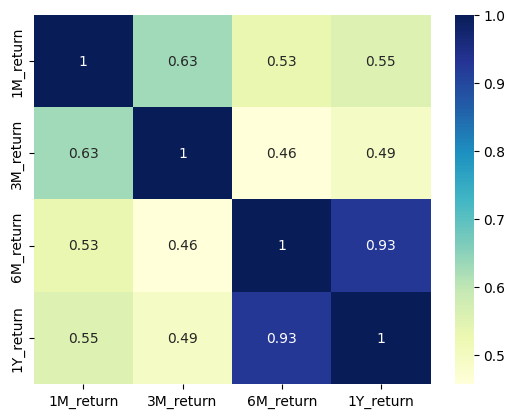

In [ ]:
# Heatmap of correlations between returns over different time horizons:
# - Strongest correlation is between 6M_return and 1Y_return (0.93), indicating mid-term and annual performance tend to move together.
# - 1M_return has moderate correlation with longer horizons (0.53–0.63), suggesting short-term movements only partially predict longer-term trends.
# - 3M_return shows relatively weaker correlations, especially with 6M_return (0.46), implying quarterly performance may diverge from half-year outcomes.

data_corr = df[['1M_return','3M_return','6M_return','1Y_return']].corr()

sns.heatmap(data_corr,cmap='YlGnBu',annot=True)
plt.show()

### Top 15 Funds by Sharpe Ratio – Risk-Adjusted Performance

In [ ]:
# Risk-return analysis: Top 15 funds ranked by Sharpe ratio.
# - Sharpe ratio measures return per unit of risk, higher values indicate better risk-adjusted performance.
# - VMV leads with a Sharpe of 31.88 despite moderate real_1y_return (16.62%), showing exceptional stability.
# - Many top performers have consistent multi-year returns and large fund sizes, suggesting investor confidence.
# - Missing 3Y_return or fund_size_in_M values indicate incomplete data for some funds, but Sharpe ranking remains valid.

sharpe_return = df[['fund_code','real_1y_return','3Y_return','fund_size_in_M','sharpe']].sort_values(by='sharpe',ascending=False).head(15)
sharpe_return

,fund_code,real_1y_return,3Y_return,fund_size_in_M,sharpe
152,VMV,16.62,NaN,4440.00,31.8788
143,NJY,17.23,260.5579,460.04,31.6426
72,RPT,20.22,233.2488,851.22,29.8820
67,HVK,20.98,232.6220,1230.00,28.7886
88,NVT,19.31,NaN,412.38,27.1908
113,AHU,18.46,226.5217,250.25,27.0907
142,NSA,17.23,NaN,1160.00,27.0375
218,ZPG,11.74,181.2295,928.72,27.0218
166,KTR,15.06,189.3298,17180.00,26.9650
81,OLE,19.56,203.2027,324.68,26.8388


### Top 15 Lowest Maximum Loss Funds – Safe Haven Analysis

In [ ]:
# Identifying "safe haven" funds with minimal maximum loss (max_loss = 0 for all shown).
# - These funds show stable returns with zero recorded drawdowns, making them low-risk candidates.
# - Sharpe ratios remain strong (25–26), indicating competitive risk-adjusted performance despite low volatility.
# - Suitable for conservative investors prioritizing capital preservation over aggressive growth.

safe_havens = df[['fund_code','6M_return','1Y_return','real_1y_return','max_loss','sharpe']].sort_values(by='max_loss',ascending=True).head(15)
safe_havens

,fund_code,6M_return,1Y_return,real_1y_return,max_loss,sharpe
118,HSL,24.3156,57.8557,18.23,0.0,25.6047
187,KSV,21.5760,51.2277,13.26,0.0,26.2830
77,DCB,25.3853,59.8908,19.75,0.0,25.9907
181,MPF,22.2911,51.6808,13.60,0.0,26.1499
180,AC1,22.3982,51.7135,13.63,0.0,26.1840
172,PVK,21.9491,52.7674,14.42,0.0,26.2397
168,TOT,22.6642,53.3755,14.87,0.0,25.4893
166,KTR,23.2102,53.6221,15.06,0.0,26.9650
162,EKF,23.1759,54.2155,15.50,0.0,26.0813
161,AYR,23.3471,54.4252,15.66,0.0,25.6166


### Average Max Loss and Sharpe Ratio by SPK Risk Level

In [ ]:
# Grouped analysis of average maximum loss and Sharpe ratio by SPK risk level.
# - Risk level 1 funds show the highest Sharpe (24.825) with negligible max loss (0.141), confirming low-risk efficiency.
# - Sharpe ratio declines sharply as risk level increases, with level 7 showing the lowest (1.813) despite highest drawdowns.
# - Highlights inverse relationship between fund risk level and risk-adjusted performance in this dataset.

result = df.groupby('spk_risk_level')[['max_loss','sharpe']].mean().round(3).sort_values(by='sharpe',ascending=False)
result

,max_loss,sharpe
spk_risk_level,,
1,0.141,24.825
2,1.182,19.381
3,3.681,8.858
4,7.476,3.951
5,9.093,2.866
6,11.783,2.466
7,21.669,1.813


### Annual Fee vs Sharpe Ratio (Hexbin)

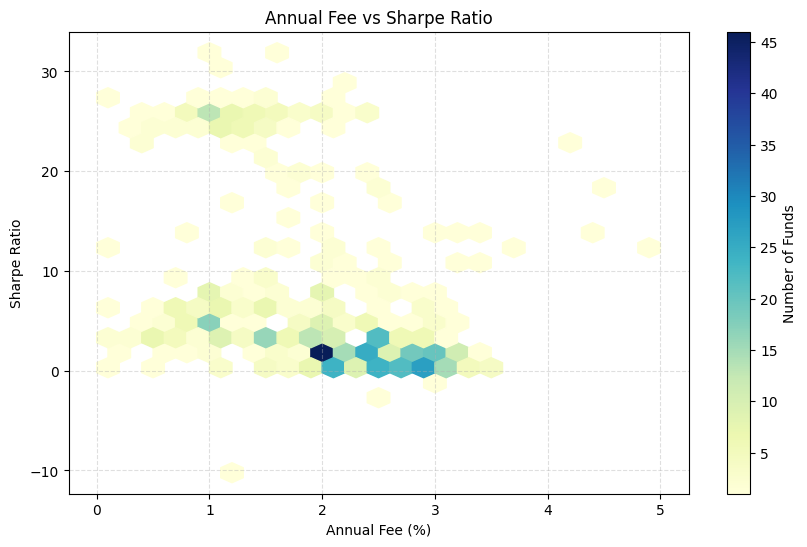

In [ ]:
## Annual Fee vs Sharpe Ratio (Hexbin)
# This hexbin chart visualizes the relationship between annual fees (%) and Sharpe ratios across all funds.
# Color intensity represents the number of funds in each hexbin cell.
# Most funds cluster around 1–3% annual fee, with Sharpe ratios concentrated near 0–5.
# Some outliers exhibit extremely high Sharpe ratios (>20), typically with lower annual fees.

plt.figure(figsize=(10,6))
hexbin= plt.hexbin(df['annual_fee'],df['sharpe'],gridsize=25,cmap='YlGnBu',mincnt=1)
plt.colorbar(hexbin,label='Number of Funds')
plt.xlabel('Annual Fee (%)')
plt.ylabel('Sharpe Ratio')
plt.title('Annual Fee vs Sharpe Ratio')
plt.grid(True,linestyle='--',alpha=0.4)
plt.show()

### Annual Fee vs Sharpe Ratio by Fund Type

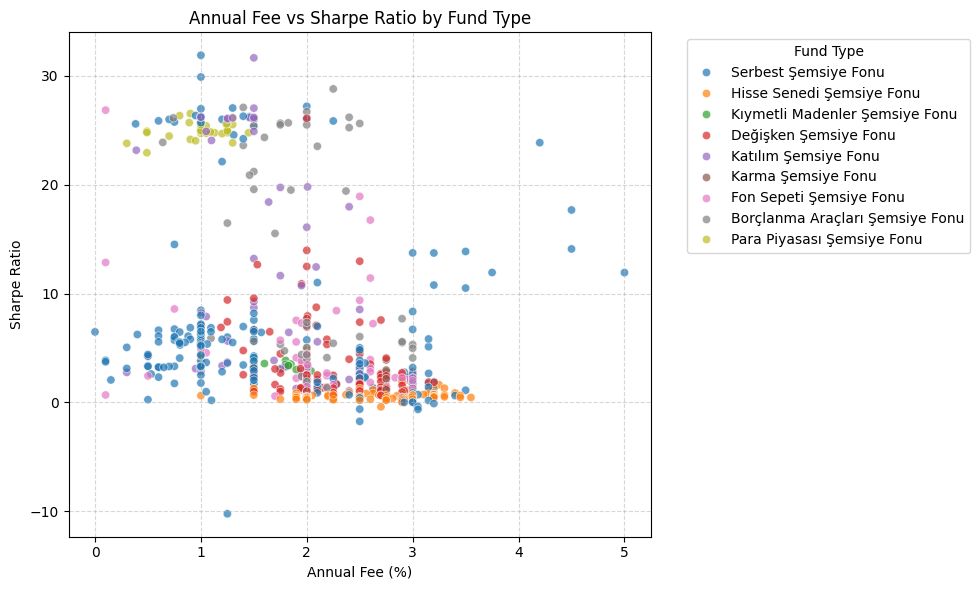

In [ ]:
## Annual Fee vs Sharpe Ratio by Fund Type (Scatter)
# This scatter plot shows the distribution of annual fees and Sharpe ratios, grouped by fund type.
# Fund type differences become visible: 
#   - Para Piyasası and Borçlanma Araçları funds often have higher Sharpe ratios at low annual fees.
#   - Hisse Senedi funds tend to cluster around lower Sharpe ratios despite varying fees.
# Helps identify which categories deliver better risk-adjusted returns relative to fees.

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='annual_fee',
    y='sharpe',
    hue='fund_type',      
    palette='tab10',      
    alpha=0.7
)

plt.title('Annual Fee vs Sharpe Ratio by Fund Type')
plt.xlabel('Annual Fee (%)')
plt.ylabel('Sharpe Ratio')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fund Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Net Return Champions - Top 15

In [ ]:
## Net Return Champions - Top 15
# Lists the top 20 funds ranked by highest annual net return.
# Includes their annual fee and real 1-year return for context.
# Useful for identifying high-return performers regardless of fees.

champs = df[['fund_code','annual_fee','annual_net_return','real_1y_return']].sort_values(by='annual_net_return',ascending=False).head(20)
champs

,fund_code,annual_fee,annual_net_return,real_1y_return
0,TLY,0.000000,4651.89,3402.96
1,ZJI,0.100000,242.51,154.67
2,ZJB,0.100000,232.55,147.45
3,IIE,3.150315,136.20,79.08
4,DDF,0.600000,118.11,65.71
5,BDC,0.700000,114.31,61.94
6,RTP,2.000000,105.01,53.43
7,HGV,2.000000,98.29,49.61
8,BDS,1.000000,92.98,45.44
9,KLH,1.500000,91.41,44.61


### High Fee Ceiling Risk Funds

In [ ]:
## High Fee Ceiling Risk Funds
# Filters funds whose annual fee is at least 80% of their maximum allowed total expense ratio.
# Shows fund code, type, annual fee, and the regulatory fee ceiling.
# Helps flag funds that may be expensive relative to the regulatory maximum, posing a cost risk to investors.

fee_ceiling_risk = df[df['annual_fee'] >=0.8 * df['annual_max_total_expense_ratio']][['fund_code','fund_type','annual_fee','annual_max_total_expense_ratio']]

fee_ceiling_risk = fee_ceiling_risk.sort_values(by='annual_fee',ascending=False)

fee_ceiling_risk.head(15)

,fund_code,fund_type,annual_fee,annual_max_total_expense_ratio
117,NSK,Serbest Şemsiye Fonu,4.50000,0.00
647,YAS,Hisse Senedi Şemsiye Fonu,3.54999,3.65
643,YDI,Hisse Senedi Şemsiye Fonu,3.44998,3.65
600,YHS,Hisse Senedi Şemsiye Fonu,3.44998,3.65
596,FSG,Serbest Şemsiye Fonu,3.40000,0.00
539,AK3,Hisse Senedi Şemsiye Fonu,3.40000,3.65
186,YAY,Hisse Senedi Şemsiye Fonu,3.24850,3.65
502,GMA,Değişken Şemsiye Fonu,3.20250,3.65
622,GL1,Hisse Senedi Şemsiye Fonu,3.20250,3.65
632,GSP,Hisse Senedi Şemsiye Fonu,3.20250,3.65


### Best Overall Balanced Funds in a Year

In [ ]:
## Best Overall Balanced Funds in a Year
# Identifies the top balanced funds for the year by combining return and risk-adjusted metrics.
# This ranking accounts for both performance (returns) and stability (risk measures like Sharpe ratio).
# Useful for finding funds that deliver strong gains while maintaining reasonable risk levels.

score = (
    df['sharpe'].rank(ascending=False) +
    df['1Y_return'].rank(ascending=False) +
    df['max_loss'].rank(ascending=True)
) / 3

result = df[['fund_code','spk_risk_level', 'sharpe', '1Y_return', 'real_1y_return', 'max_loss']].copy()

# Normalize to 0–100, higher = better
score_normalized = 100 * (score.max() - score) / (score.max() - score.min())

result['score'] = score_normalized.round(2)

best_balanced_funds = result.sort_values(by='score', ascending=False)
best_balanced_funds.head(20)


,fund_code,spk_risk_level,sharpe,1Y_return,real_1y_return,max_loss,score
67,HVK,2,28.7886,61.5389,20.98,0.0000,100.00
72,RPT,2,29.8820,60.5114,20.22,0.0000,99.79
81,OLE,2,26.8388,59.6313,19.56,0.0000,98.97
85,NRG,1,26.5277,59.4300,19.41,0.0000,98.66
68,KSA,2,25.8451,61.3769,20.86,0.0000,98.25
70,PRU,2,25.7498,61.1189,20.67,0.0000,98.04
77,DCB,1,25.9907,59.8908,19.75,0.0000,97.94
90,OSD,1,26.1294,59.1392,19.19,0.0000,97.79
82,HVT,2,25.8795,59.5788,19.52,0.0000,97.63
111,DGH,1,26.3429,58.2612,18.53,0.0000,97.27


### Fund Size vs. Sharpe Ratio by SPK Risk Level

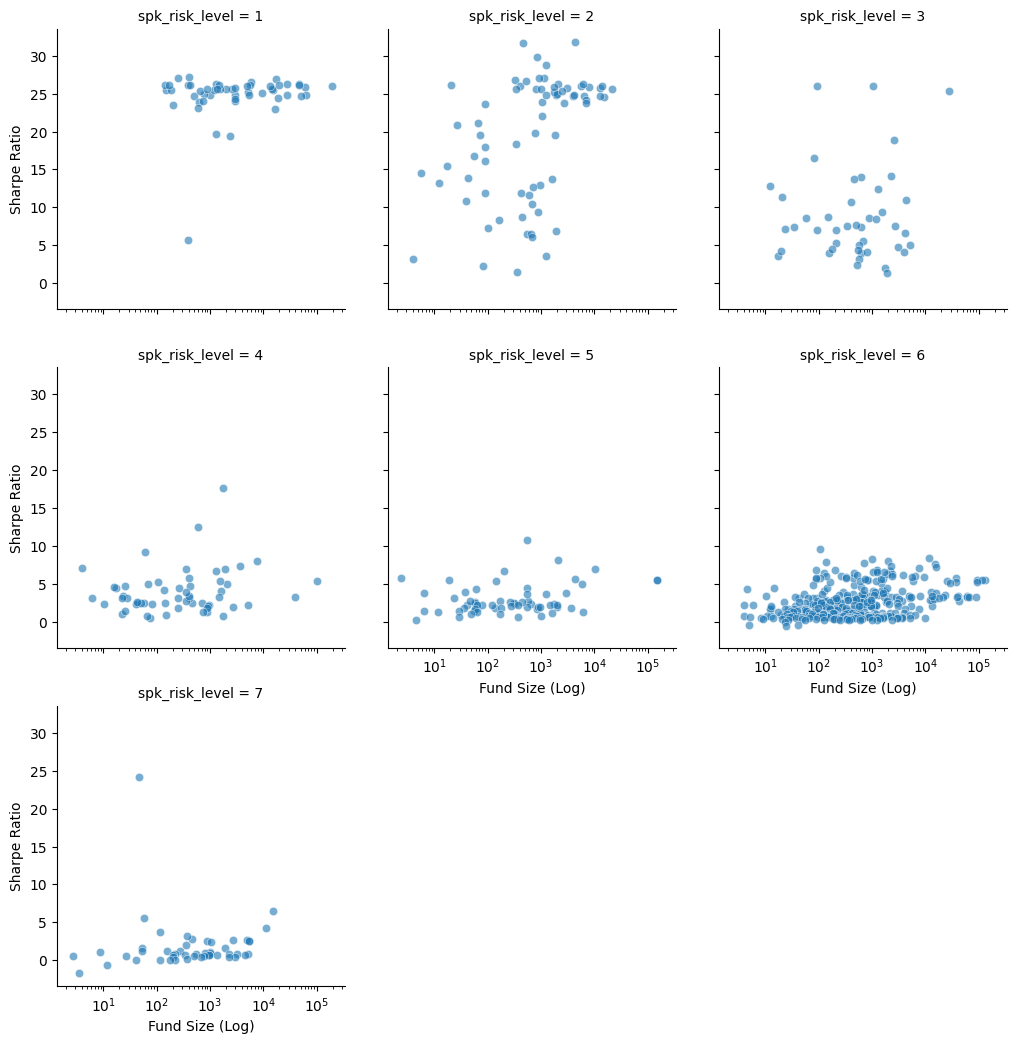

In [ ]:
## Fund Size vs. Sharpe Ratio by SPK Risk Level
# Creates scatter plots showing the relationship between fund size (log scale) and Sharpe ratio,
# separated by SPK risk level categories (1–7). Helps analyze whether larger funds within each
# risk category tend to have higher or lower risk-adjusted returns.

g = sns.FacetGrid(df, col='spk_risk_level', col_wrap=3, height=3.5)
g.map_dataframe(sns.scatterplot, x='fund_size_in_M', y='sharpe', alpha=0.6)
g.set(xscale='log')
g.set_axis_labels('Fund Size (Log)', 'Sharpe Ratio')

### Category Leaders – Best Funds by Sharpe, Max Loss, and Annual Net Return

In [ ]:
# For each fund category, we identify:
# 1. The fund with the highest Sharpe ratio (best risk-adjusted performance).
# 2. The fund with the lowest maximum drawdown (best downside protection).
# 3. The fund with the highest annual net return (best raw profitability).
#
# This table merges the top performers for each metric by fund type, showing
# standout funds across different risk/return dimensions.
#
# Example:
# - HVK (Borçlanma Araçları Şemsiye Fonu) leads in Sharpe (28.79) and has zero drawdown,
#   with a solid annual net return of 61.51%.
# - TLY (Serbest Şemsiye Fonu) shows an extreme annual net return (4651.89%), 
#   although this may indicate an outlier or one-off event rather than sustainable performance.

best_sharpe = df.loc[df.groupby('fund_type')['sharpe'].idxmax(),['fund_type','fund_code','sharpe']]
best_max_loss = df.loc[df.groupby('fund_type')['max_loss'].idxmin(),['fund_type','fund_code','max_loss']]
best_return = df.loc[df.groupby('fund_type')['annual_net_return'].idxmax(),['fund_type','fund_code','annual_net_return']]

category_leaders = best_sharpe.merge(best_max_loss, on='fund_type',suffixes=('_sharpe','_max_loss'))
category_leaders = category_leaders.merge(best_return, on='fund_type')

category_leaders

,fund_type,fund_code_sharpe,sharpe,fund_code_max_loss,max_loss,fund_code,annual_net_return
0,Borçlanma Araçları Şemsiye Fonu,HVK,28.7886,HVK,0.0000,HVK,61.51
1,Değişken Şemsiye Fonu,MBL,26.0906,MBL,0.0751,GBV,81.49
2,Fon Sepeti Şemsiye Fonu,OLE,26.8388,OLE,0.0000,MJG,71.16
3,Hisse Senedi Şemsiye Fonu,BIH,4.8587,ZSF,4.9301,BDS,92.98
4,Karma Şemsiye Fonu,IJB,3.9009,IKL,8.0796,IJB,74.63
5,Katılım Şemsiye Fonu,NJY,31.6426,NJY,0.0000,HAM,81.30
6,Kıymetli Madenler Şemsiye Fonu,MKG,3.9913,MKG,5.7021,NAU,91.27
7,Para Piyasası Şemsiye Fonu,NRG,26.5277,HVT,0.0000,PPT,60.17
8,Serbest Şemsiye Fonu,VMV,31.8788,KSA,0.0000,TLY,4651.89


## Top 10 funds as low, medium, and high risks 
**(ENG) Is not investment advice** 
**(TUR) Yatirim tavsiyesi degildir**

**Philosophy:** Prioritize long‑term consistency, risk‑adjusted returns, reasonable fees, and capital preservation.

**Universe filter (behavioral low risk):**
- Sharpe > 1.0  
- Max loss > −20% (shallower drawdowns)  
- Annual fee ≤ 2%  
- Real 1Y return > 0 (inflation‑adjusted)  
- Fund size ≥ 50M (avoid tiny, illiquid funds)

**Scoring (0–100 percentile ranks; higher = better):**
- 30% Sharpe, 20% 1Y return, 20% *inverse* max loss, 15% *inverse* fee, 15% annual net return.  
- Percentiles via `rankdata`; risk/fee are inverted so “lower is better” becomes “higher score”.

> Note: If you want SPK buckets, add `spk_risk_level <= 3` for *low*, `4–5` for *medium*, `6–7` for *high*. Current screen is **behavior‑based** rather than label‑based.

### Top 10 Low‑Risk Funds (Aug 2025) (Not investment advice)

In [ ]:
# RPT – Best overall balance: strong returns, very high Sharpe, solid 3Y growth.
# PRU – Top 1Y performer in the list, still low risk.
# EIL – Standout long-term compounding, huge 5Y growth.
# DGH – Similar to EIL, excellent 5Y performance with stability.
# OLE – Very low fee + strong 3Y track record, cost-efficient pick.


from scipy.stats import rankdata

def get_top_funds_by_risk(df, risk_levels, top_n=10):
    """Filter, score, and return top funds for given risk levels."""
    
    # Step 1 – Filter investment universe
    filtered = df[
        (df['spk_risk_level'].isin(risk_levels)) &
        (df['sharpe'] > 1.0) &
        (df['max_loss'] > -20) &
        (df['annual_fee'] <= 2) &
        (df['real_1y_return'] > 0) &
        (df['fund_size_in_M'] >= 50)
    ].dropna(subset=[
        'sharpe', 'max_loss', 'annual_fee', 'annual_net_return',
        '1Y_return', 'real_1y_return', 'fund_size_in_M'
    ])

    # Step 2 – Ranking
    def percentile_rank(series):
        return rankdata(series, method='average') / len(series) * 100

    filtered['1Y_return_score'] = percentile_rank(filtered['1Y_return'])
    filtered['sharpe_score'] = percentile_rank(filtered['sharpe'])
    filtered['max_loss_score'] = percentile_rank(-filtered['max_loss'])  # inverted
    filtered['annual_fee_score'] = percentile_rank(-filtered['annual_fee'])  # inverted
    filtered['annual_net_return_score'] = percentile_rank(filtered['annual_net_return'])

    # Step 3 – Final score
    filtered['final_score'] = (
        filtered['1Y_return_score'] * 0.20 +
        filtered['sharpe_score'] * 0.30 +
        filtered['max_loss_score'] * 0.20 +
        filtered['annual_fee_score'] * 0.15 +
        filtered['annual_net_return_score'] * 0.15
    ).round(2)

    # Step 4 – Return top N
    return (
        filtered.sort_values('final_score', ascending=False)
        .head(top_n)
        [[
            'fund_code', 'fund_type', 'fund_size_in_M', 'spk_risk_level',
            '1Y_return', 'real_1y_return','3Y_return','5Y_return', 'sharpe', 'max_loss', 'annual_fee', 'final_score'
        ]]
        .reset_index(drop=True)
    )

# Low risk (1–3)
top_10_low = get_top_funds_by_risk(df, [1, 2, 3], top_n=10)

top_10_low

,fund_code,fund_type,fund_size_in_M,spk_risk_level,1Y_return,real_1y_return,3Y_return,5Y_return,sharpe,max_loss,annual_fee,final_score
0,RPT,Serbest Şemsiye Fonu,851.22,2,60.5114,20.22,233.2488,NaN,29.8820,0.0000,1.00000,90.67
1,OLE,Fon Sepeti Şemsiye Fonu,324.68,2,59.6313,19.56,203.2027,NaN,26.8388,0.0000,0.10000,89.91
2,NRG,Para Piyasası Şemsiye Fonu,5970.00,1,59.4300,19.41,220.4775,NaN,26.5277,0.0000,0.90000,86.09
3,PRU,Serbest Şemsiye Fonu,13000.00,2,61.1189,20.67,NaN,NaN,25.7498,0.0000,0.75000,84.19
4,DCB,Serbest Şemsiye Fonu,192710.00,1,59.8908,19.75,215.2669,NaN,25.9907,0.0000,0.70000,83.77
5,OSD,Borçlanma Araçları Şemsiye Fonu,393.79,1,59.1392,19.19,213.0182,373.9987,26.1294,0.0000,0.74000,82.36
6,EIL,Para Piyasası Şemsiye Fonu,2130.00,2,59.6878,19.60,192.2363,307.5809,26.3342,0.0336,0.79935,81.85
7,DGH,Serbest Şemsiye Fonu,1290.00,1,58.2612,18.53,208.0875,331.2853,26.3429,0.0000,0.95000,77.89
8,HVT,Para Piyasası Şemsiye Fonu,1790.00,2,59.5788,19.52,NaN,NaN,25.8795,0.0000,1.25000,76.11
9,AAL,Para Piyasası Şemsiye Fonu,2600.00,1,59.0301,19.11,193.6464,296.8835,25.6416,0.0000,1.00000,74.17


### Top 10 Medium-Risk Funds (Aug 2025) (Not investment advice)

In [ ]:
# RPD (Değişken Şemsiye Fonu) – 56.89% 1Y return (real 17.50%), Sharpe 6.89, low drawdown (-2.20%), fee 1.19%. Balanced performer.  
# FDG (Değişken Şemsiye Fonu) – 72.28% 1Y (real 29.03%), Sharpe 6.66, drawdown -2.92%, fee 1.50%. Higher return, slightly more risk.  
# SPE (Serbest Şemsiye Fonu) – 38.01% 1Y (real 3.36%), Sharpe 8.19, drawdown -3.05%, fee 1.50%. Efficiency leader.  
# RTP (Serbest Şemsiye Fonu) – 104.87% 1Y (real 53.43%), Sharpe 5.28, drawdown -3.15%, fee 1.00%. High-return, well-controlled risk.  
# RBK (Katılım Şemsiye Fonu) – Sharpe 9.25, drawdown -0.33%, fee 0.33%, real 1Y 1.71%. Stability-focused, consistent performer.
top_10_medium = get_top_funds_by_risk(df, [4, 5], top_n=10)

top_10_medium

,fund_code,fund_type,fund_size_in_M,spk_risk_level,1Y_return,real_1y_return,3Y_return,5Y_return,sharpe,max_loss,annual_fee,final_score
0,RPD,Değişken Şemsiye Fonu,351.34,4,56.8926,17.50,465.1231,NaN,6.8887,2.2043,1.19,86.07
1,FDG,Değişken Şemsiye Fonu,1320.00,4,72.2779,29.03,NaN,NaN,6.6582,2.9230,1.50,84.64
2,ARL,Fon Sepeti Şemsiye Fonu,3710.00,4,45.5939,9.04,250.3863,480.9704,7.2901,2.6837,1.95,78.30
3,FFP,Fon Sepeti Şemsiye Fonu,1530.00,4,40.3255,5.10,210.5350,NaN,5.3576,4.7767,1.00,71.79
4,SPE,Serbest Şemsiye Fonu,2080.00,5,38.0063,3.36,244.8907,894.0762,8.1891,3.0566,1.50,70.89
5,IAU,Serbest Şemsiye Fonu,61.71,5,50.6765,12.85,NaN,NaN,4.2598,4.7271,1.50,69.64
6,RTP,Serbest Şemsiye Fonu,2080.00,4,104.8662,53.43,716.3151,NaN,4.9833,5.5685,2.00,68.57
7,DSP,Fon Sepeti Şemsiye Fonu,108.31,4,37.5895,3.05,267.0934,524.7116,5.2800,3.1566,1.00,67.86
8,RBK,Katılım Şemsiye Fonu,60.74,4,35.8090,1.71,167.4480,455.2909,9.2499,0.3295,1.50,67.68
9,OFS,Fon Sepeti Şemsiye Fonu,138.38,4,44.3336,8.10,254.0623,NaN,4.2443,5.1295,0.50,66.79


### Top 10 High-Risk Funds (Aug 2025) (Not investment advice)

In [ ]:
# The high-risk category reveals both extreme outliers and relatively balanced aggressive performers.  
# TLY posted an extraordinary +4577% 1Y return with a max loss of 23%, likely a speculative anomaly rather than sustainable growth.  
# ZJB and ZJI achieved over +200% 1Y returns while keeping max loss near 10%, making them aggressive but less chaotic than TLY.  
# MKG and NAU (precious metals) delivered strong Sharpe ratios (~3.9) and solid 1Y returns (74–94%), offering commodity-based high-risk exposure.  
# ZCD stands out for its balance — 88% 1Y return, Sharpe 4.24, and 7.5% max loss.  
# BDS (equity) surprised with 94% 1Y return and decent Sharpe (3.42), hinting at effective stock selection.  
# TCA, the largest by fund size, had a more modest +73.9% 1Y return and lower Sharpe (3.36), reflecting steadier high-risk exposure.  

# Overall, while outliers like TLY dominate headlines, more sustainable high-risk picks may be ZCD, MKG, and BDS, balancing aggressive growth with better risk-adjusted performance.

top_10_high = get_top_funds_by_risk(df, [6, 7], top_n=10)

top_10_high

,fund_code,fund_type,fund_size_in_M,spk_risk_level,1Y_return,real_1y_return,3Y_return,5Y_return,sharpe,max_loss,annual_fee,final_score
0,ZCD,Serbest Şemsiye Fonu,1550.00,6,88.8783,41.46,NaN,NaN,4.2417,7.5353,0.5,79.33
1,TLY,Serbest Şemsiye Fonu,14910.00,7,4577.1530,3402.96,53559.0468,NaN,6.4795,23.2366,0.0,77.78
2,MKG,Kıymetli Madenler Şemsiye Fonu,1050.00,6,74.5865,30.76,347.3087,862.9192,3.9913,5.7021,1.5,75.75
3,ZJI,Serbest Şemsiye Fonu,12930.00,6,240.0395,154.67,582.5122,NaN,3.8664,10.6828,0.1,75.12
4,ZJB,Serbest Şemsiye Fonu,15960.00,6,230.3955,147.45,561.8631,NaN,3.7332,10.5744,0.1,73.29
5,NAU,Kıymetli Madenler Şemsiye Fonu,1770.00,6,90.9021,42.98,NaN,NaN,3.8574,6.6416,1.8,71.31
6,NJF,Katılım Şemsiye Fonu,600.29,6,72.2844,29.03,329.0728,NaN,3.4279,6.0263,1.0,70.16
7,BDS,Hisse Senedi Şemsiye Fonu,1640.00,6,94.1952,45.44,NaN,NaN,3.8703,13.0068,1.0,69.68
8,HAM,Katılım Şemsiye Fonu,448.68,6,79.9185,34.75,NaN,NaN,3.7092,7.5681,1.5,67.66
9,TCA,Katılım Şemsiye Fonu,41210.00,6,73.9480,30.28,322.4054,821.4574,3.3645,6.4740,1.2,67.26


# Overall Fund Evaluation by Risk Level  
*(ENG: This is not investment advice / TUR: Yatırım tavsiyesi değildir)*  

## 1. Low-Risk Funds  
These funds prioritize capital preservation and stable returns with minimal volatility.  
- Top performers like **RPT**, **OLE**, and **NRG** delivered strong **~59–61% 1Y returns**, high Sharpe ratios (25–30), and negligible drawdowns, indicating well-managed portfolios.  
- Money market and free umbrella funds dominate, benefiting from stability in fixed-income markets.  
- Fees remain modest (mostly under 1%), enhancing net returns.  
- Investors seeking steady performance without large drawdowns would find this category appealing.  

**Key Insight:** Low-risk leaders offer consistent growth with near-zero losses, making them strong defensive holdings in a balanced portfolio.

---

## 2. Medium-Risk Funds  
These aim for a balance between return potential and moderate volatility.  
- Standouts include **RTP** (104% 1Y return) and **FDG** (72% 1Y return) with Sharpe ratios above 6, suggesting excellent risk-adjusted performance.  
- **IAU** and **ARL** show resilience, offering solid returns while maintaining acceptable drawdowns (~3–5%).  
- Fee structures vary more widely, with some exceeding 2%, which may impact net performance over time.  
- Strong performers in this group tend to blend diversified asset allocation with selective exposure to equities and alternative assets.  

**Key Insight:** Medium-risk funds offer the best balance of performance and stability, ideal for growth-oriented investors who can tolerate moderate volatility.

---

## 3. High-Risk Funds  
Designed for aggressive growth, these funds show wide performance dispersion.  
- **TLY**’s exceptional **+4577% 1Y return** is an extreme outlier, likely driven by speculative or niche market exposure.  
- **ZJB** and **ZJI** post over **+200% returns** with max losses near 10%, offering aggressive yet relatively controlled profiles.  
- Precious metals funds **MKG** and **NAU** provide commodity-driven gains (74–94% 1Y returns) with Sharpe ratios around 3.9.  
- **BDS** and **ZCD** balance high returns with better Sharpe scores, making them more sustainable high-risk picks.  

**Key Insight:** While outliers grab attention, sustainable high-risk plays often come from funds that combine triple-digit returns with moderate drawdowns.

---

## General Insights Across All Risk Levels  
1. **Risk-Adjusted Performance Matters:** High raw returns don’t always mean better investments—Sharpe ratio reveals efficiency.  
2. **Fees Can Erode Gains:** Low-cost structures in top funds allow compounding to work more effectively.  
3. **Drawdown Control is Key:** Even in high-risk categories, the most resilient funds manage to limit maximum losses.  
4. **Diversification by Risk Level:** A blend of low, medium, and selected high-risk funds can optimize both stability and growth.  
5. **Outlier Caution:** Exceptional returns (like TLY) may not be sustainable; focus on repeatable performance.  


---

## About the Author:
Burak Ozteke is a Computer Science student with a focus on **data analysis, financial modeling, and machine learning**.  
This analysis combines data engineering, statistical evaluation, and domain knowledge to provide insights into the Turkish investment fund market.

Data Sources:  
- **TEFAS** – Fund performance & analysis  
- **fonbul.com** – Risk metrics & fund details  
- **TCMB (TÜFE)** – Inflation data  

© Burak Ozteke, 2025. All rights reserved. 